<a href="https://colab.research.google.com/github/CajetanObi/Customer_Churn_Project/blob/main/Churn_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Project Understanding and Goal Definition

## 1.1 Define the Problem
- **What is customer churn?**  
  Customer churn refers to customers who stop using a company’s products or services. In your dataset, this is represented by the `Exited` column, where:
  - `Exited = 1`: The customer has churned.
  - `Exited = 0`: The customer has not churned.

- **Why is predicting churn important?**  
  Predicting churn helps businesses identify at-risk customers and take proactive measures to retain them, such as offering discounts, personalized services, or targeted marketing campaigns.

- **What is the goal of this project?**  
  The goal is to build a supervised learning model that can predict whether a customer will churn (`Exited = 1`) based on their features (e.g., CreditScore, Geography, Age, Balance, etc.).

---

## 1.2 Understand the Business Context
- **Who are the stakeholders?**  
  Identify who will use the results of this project (e.g., marketing teams, customer retention teams, or business executives).

- **What actions will be taken based on the predictions?**  
  For example:
  - High-risk customers could be flagged for retention campaigns.
  - Insights from the model could help improve customer satisfaction or product offerings.

- **What are the costs of false positives and false negatives?**  
  - **False Positive (FP)**: Predicting a customer will churn when they won’t. This could lead to unnecessary retention efforts and costs.
  - **False Negative (FN)**: Failing to predict a customer who will churn. This could result in losing valuable customers.

---

## 1.3 Define Success Metrics
- **What metrics will you use to evaluate the model?**  
  The choice of metrics depends on the business priorities:
  - **Accuracy**: Overall correctness of predictions. However, this can be misleading if the dataset is imbalanced.
  - **Precision**: Proportion of correctly predicted churned customers out of all predicted churned customers. Important if the cost of false positives is high.
  - **Recall (Sensitivity)**: Proportion of correctly predicted churned customers out of all actual churned customers. Important if the cost of false negatives is high.
  - **F1-Score**: Harmonic mean of precision and recall. Useful when you want to balance both metrics.
  - **AUC-ROC**: Measures the model’s ability to distinguish between churned and non-churned customers. Useful for imbalanced datasets.

- **Set a target for success**: For example, "Achieve an F1-score of at least 0.75" or "Achieve a recall of 0.8 to ensure most churned customers are identified."

---

## 1.4 Plan the Project
- **Timeline**: Estimate how much time you’ll spend on each step (e.g., EDA, modeling, evaluation).
- **Tools and Technologies**: Decide on the tools you’ll use (e.g., Python, Jupyter Notebook, Pandas, Scikit-learn, etc.).
- **Deliverables**: Define what you’ll deliver at the end of the project (e.g., a trained model, a report, visualizations, or a deployed API).

---

## 1.5 Questions to Consider
- What are the key factors that might influence customer churn in this dataset?
- How balanced is the target variable (`Exited`)? If it’s imbalanced, how will you handle it?
- Are there any domain-specific insights or assumptions you should consider?

---

## Next Steps
Once you’ve completed this step, you’ll have a clear understanding of the problem, the business context, and the success criteria. Let me know when you’re ready to move on to **Step 2: Data Collection and Understanding**, and I’ll guide you through it! 😊

In [ ]:
df  = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


## 2.3 Understand the Features

Review the dataset columns and understand what each feature represents:

- **RowNumber**: Unique row identifier (likely irrelevant for modeling).
- **CustomerId**: Unique customer identifier (likely irrelevant for modeling).
- **Surname**: Customer’s last name (likely irrelevant for modeling).
- **CreditScore**: Numeric feature representing creditworthiness.
- **Geography**: Categorical feature representing the country of the customer.
- **Gender**: Categorical feature representing the gender of the customer.
- **Age**: Numeric feature representing the customer’s age.
- **Tenure**: Numeric feature representing the number of years the customer has been with the bank.
- **Balance**: Numeric feature representing the account balance.
- **NumOfProducts**: Numeric feature representing the number of bank products the customer uses.
- **HasCrCard**: Binary feature indicating whether the customer has a credit card.
- **IsActiveMember**: Binary feature indicating whether the customer is an active member.
- **EstimatedSalary**: Numeric feature representing the estimated salary of the customer.
- **Exited**: Target variable (1 if the customer churned, 0 otherwise).

In [ ]:
df['Exited'].value_counts(normalize=True) * 100

,proportion
Exited,
0,79.63
1,20.37


In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information
print(df.info())
print(df.describe())

# Drop irrelevant columns
df.drop(columns=["RowNumber", "Surname"], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  1000

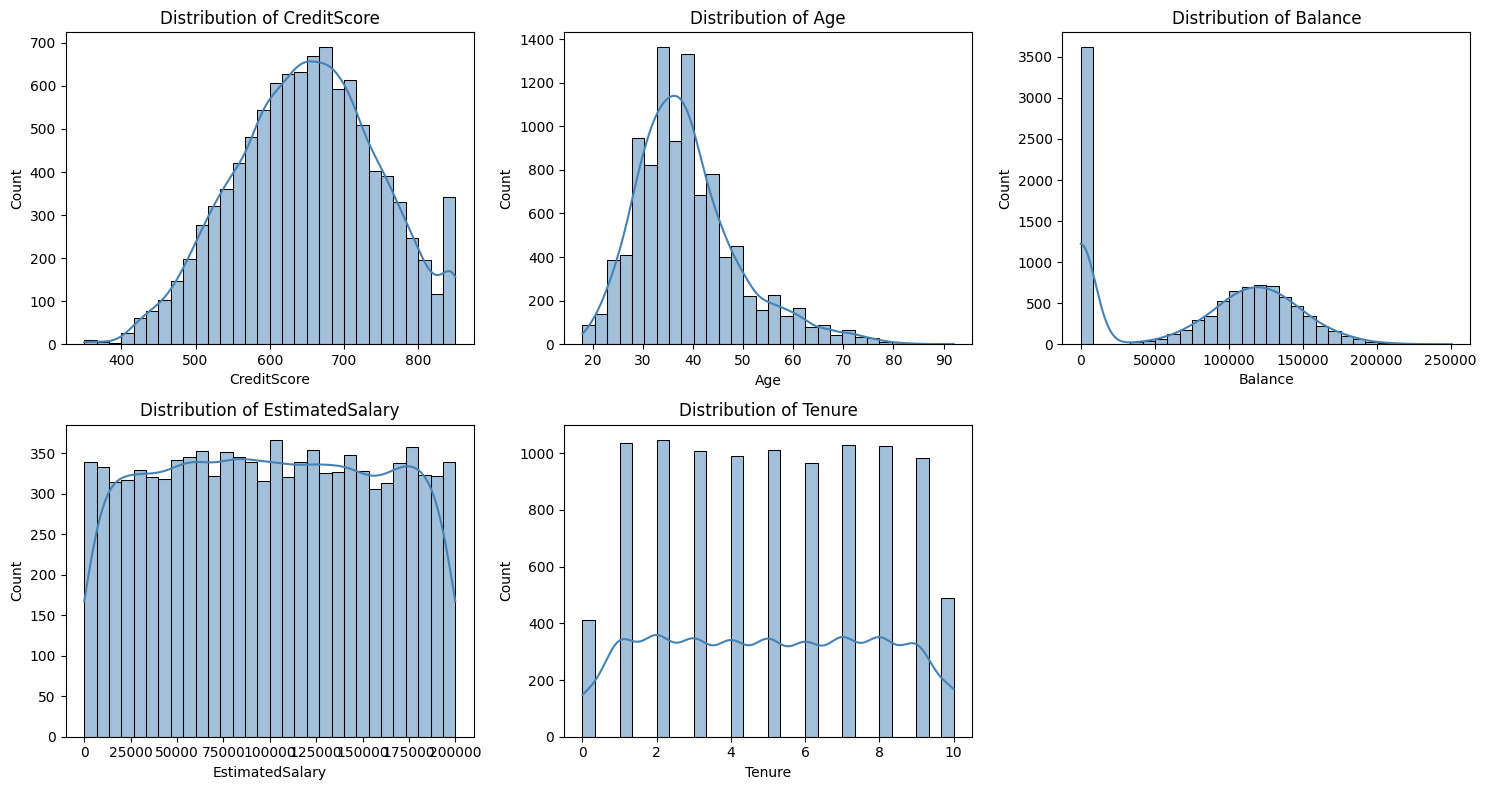

In [ ]:
# Define numerical columns
num_cols = ["CreditScore", "Age", "Balance", "EstimatedSalary", "Tenure"]

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color="steelblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


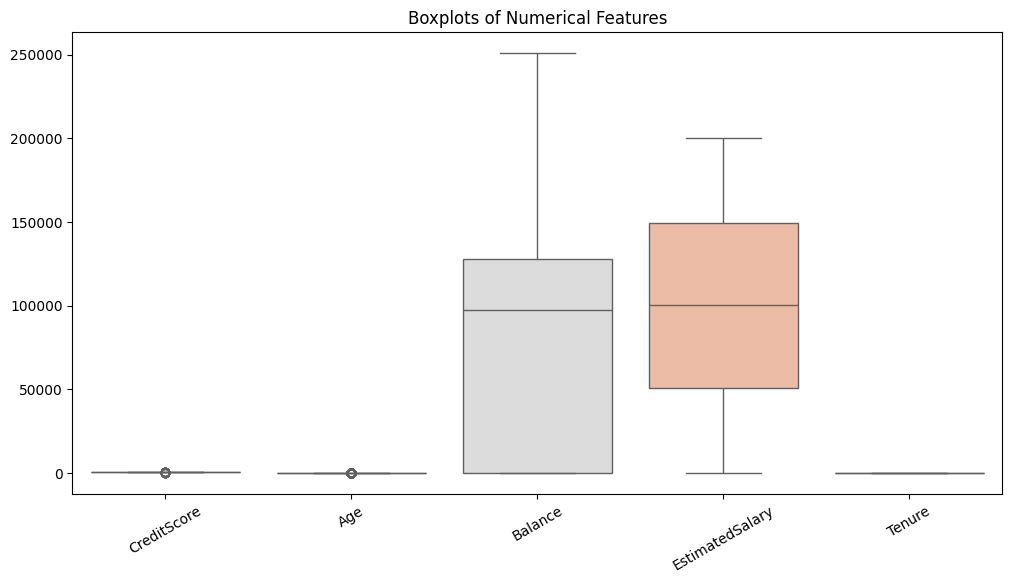

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], palette="coolwarm")
plt.xticks(rotation=30)
plt.title("Boxplots of Numerical Features")
plt.show()


<ipython-input-22-53c349d80996>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
<ipython-input-22-53c349d80996>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
<ipython-input-22-53c349d80996>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
<ipython-input-22-53c349d80996>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

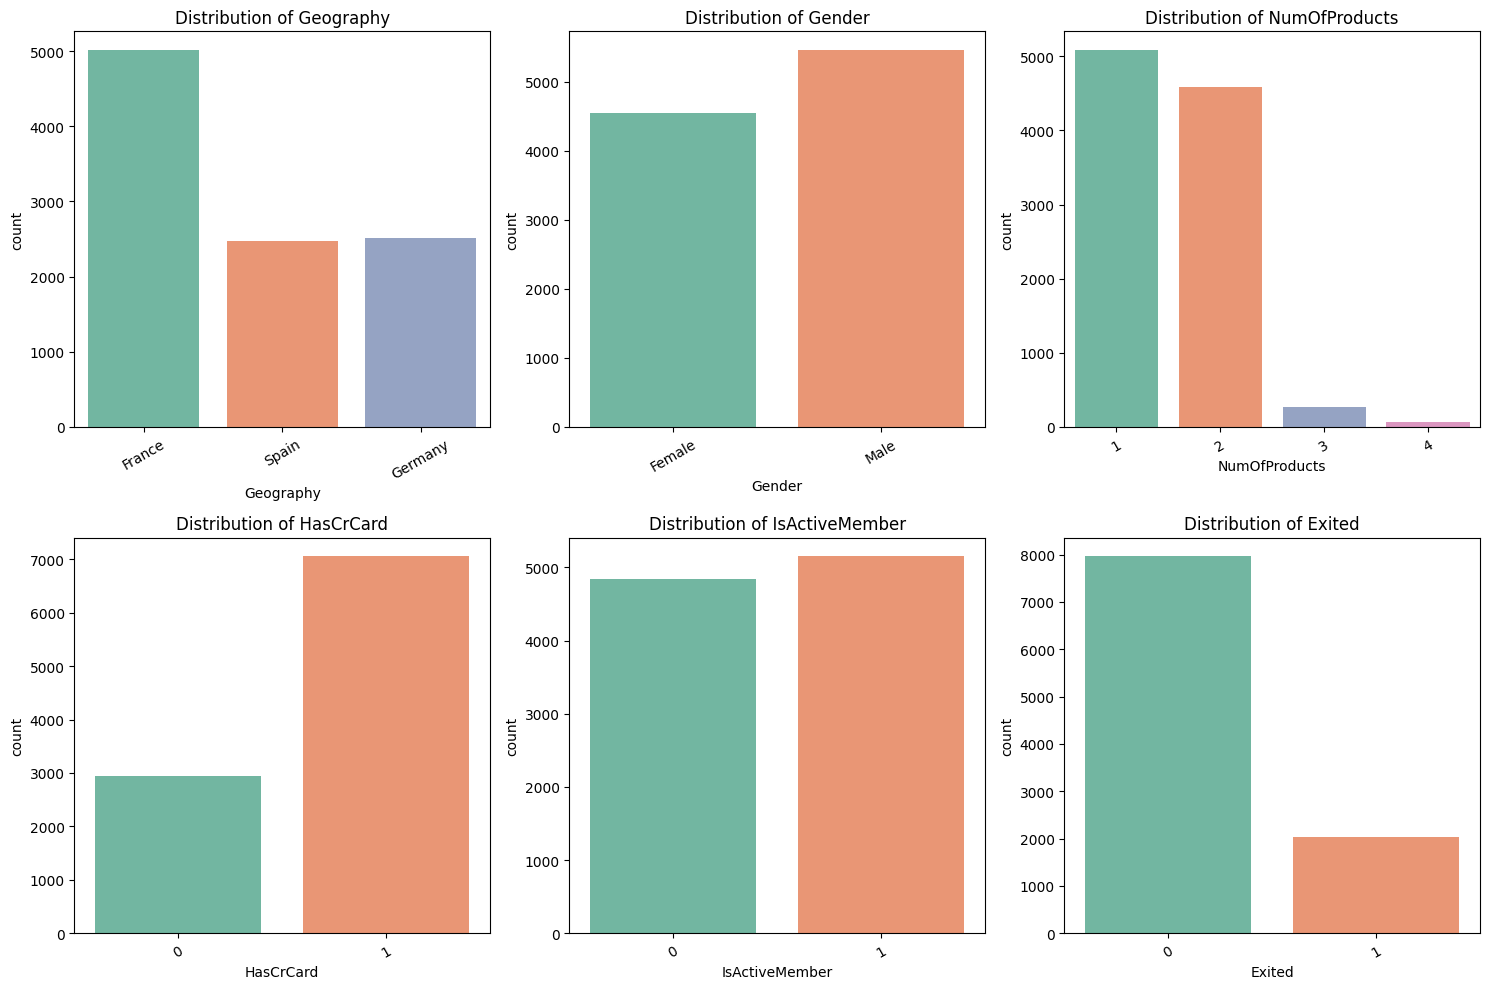

In [ ]:
# Define categorical columns
cat_cols = ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember", "Exited"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
